# Python With Binance Crypto Data


Video reference from Nicholas Renotte Youtube Channel: https://www.youtube.com/watch?v=4aqx5P2Y38U

A hobbyist data analysis project with working with cryptocurrency data from Binance.

### Steps

1. Setup
2. Authenticate
3. Get Tickers
4. Convert data into Pandas Dataframe from Given Ticker
5. Obtain Historical Binance Data
6. Preprocess Data (Change Data Types, Fix Columns)
7. Visualize Data with MPL Finance

Extra: Creating A Function For Plotting


## 1) Setup

A Binance account is required in order to obtain an API key.

Click on the profile icon and go to API Management. Create an API Key name.

Extract the API key and the secret key.


In [1]:
api_key = 'UMnKHkxRDMWLGxR39EPoAd1RzKotxVAsLVTdRMyKa93yqCXzQs9HbrmZzSk9qytt'

secret_key = 'cKe6ONuSG2dBRZWh7zT8qDdvqvSzMFgthMe5aUNBtmkaohp4yU1FAaBnrUYEkz65'

Obtain the python-binance library

In [2]:
# Pip install

!pip install python-binance pandas mplfinance

In [3]:
# Import packages

from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2) Authenticate

In [4]:
# Use Api key and secret key into Client()

client = Client(api_key, secret_key)

## 3) Get Tickers (Trading Pairs)

In [5]:
tickers = client.get_all_tickers()

# See all tickers (trading pairs):
tickers

[{'symbol': 'ETHBTC', 'price': '0.06076300'},
 {'symbol': 'LTCBTC', 'price': '0.00403000'},
 {'symbol': 'BNBBTC', 'price': '0.00950000'},
 {'symbol': 'NEOBTC', 'price': '0.00102500'},
 {'symbol': 'QTUMETH', 'price': '0.00316900'},
 {'symbol': 'EOSETH', 'price': '0.00198200'},
 {'symbol': 'SNTETH', 'price': '0.00003249'},
 {'symbol': 'BNTETH', 'price': '0.00153400'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00022500'},
 {'symbol': 'BNBETH', 'price': '0.15639000'},
 {'symbol': 'BTCUSDT', 'price': '32537.48000000'},
 {'symbol': 'ETHUSDT', 'price': '1977.24000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001592'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [6]:
tickers_list = [element['symbol'] for element in tickers]
tickers_list

['ETHBTC',
 'LTCBTC',
 'BNBBTC',
 'NEOBTC',
 'QTUMETH',
 'EOSETH',
 'SNTETH',
 'BNTETH',
 'BCCBTC',
 'GASBTC',
 'BNBETH',
 'BTCUSDT',
 'ETHUSDT',
 'HSRBTC',
 'OAXETH',
 'DNTETH',
 'MCOETH',
 'ICNETH',
 'MCOBTC',
 'WTCBTC',
 'WTCETH',
 'LRCBTC',
 'LRCETH',
 'QTUMBTC',
 'YOYOBTC',
 'OMGBTC',
 'OMGETH',
 'ZRXBTC',
 'ZRXETH',
 'STRATBTC',
 'STRATETH',
 'SNGLSBTC',
 'SNGLSETH',
 'BQXBTC',
 'BQXETH',
 'KNCBTC',
 'KNCETH',
 'FUNBTC',
 'FUNETH',
 'SNMBTC',
 'SNMETH',
 'NEOETH',
 'IOTABTC',
 'IOTAETH',
 'LINKBTC',
 'LINKETH',
 'XVGBTC',
 'XVGETH',
 'SALTBTC',
 'SALTETH',
 'MDABTC',
 'MDAETH',
 'MTLBTC',
 'MTLETH',
 'SUBBTC',
 'SUBETH',
 'EOSBTC',
 'SNTBTC',
 'ETCETH',
 'ETCBTC',
 'MTHBTC',
 'MTHETH',
 'ENGBTC',
 'ENGETH',
 'DNTBTC',
 'ZECBTC',
 'ZECETH',
 'BNTBTC',
 'ASTBTC',
 'ASTETH',
 'DASHBTC',
 'DASHETH',
 'OAXBTC',
 'ICNBTC',
 'BTGBTC',
 'BTGETH',
 'EVXBTC',
 'EVXETH',
 'REQBTC',
 'REQETH',
 'VIBBTC',
 'VIBETH',
 'HSRETH',
 'TRXBTC',
 'TRXETH',
 'POWRBTC',
 'POWRETH',
 'ARKBTC',
 'ARKETH'

In [7]:
len(tickers)

1543

In [8]:
# Pairs which have BTC

btc_pairs = [element for element in tickers if 'BTC' in element['symbol']]

btc_pairs

[{'symbol': 'ETHBTC', 'price': '0.06076300'},
 {'symbol': 'LTCBTC', 'price': '0.00403000'},
 {'symbol': 'BNBBTC', 'price': '0.00950000'},
 {'symbol': 'NEOBTC', 'price': '0.00102500'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00022500'},
 {'symbol': 'BTCUSDT', 'price': '32537.48000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001592'},
 {'symbol': 'LRCBTC', 'price': '0.00000687'},
 {'symbol': 'QTUMBTC', 'price': '0.00019240'},
 {'symbol': 'YOYOBTC', 'price': '0.00000033'},
 {'symbol': 'OMGBTC', 'price': '0.00012090'},
 {'symbol': 'ZRXBTC', 'price': '0.00002214'},
 {'symbol': 'STRATBTC', 'price': '0.00003085'},
 {'symbol': 'SNGLSBTC', 'price': '0.00000024'},
 {'symbol': 'BQXBTC', 'price': '0.00006282'},
 {'symbol': 'KNCBTC', 'price': '0.00004390'},
 {'symbol': 'FUNBTC', 'price': '0.00000046'},
 {'symbol': 'SNMBTC', 'price': '0.00000448'},
 {'symbol': 'IOTABTC', 

In [9]:
len(btc_pairs)

361

### ETH Trading Pairs

In [10]:
# Pairs which have ETH

eth_pairs = [element for element in tickers if 'ETH' in element['symbol']]

eth_pairs

[{'symbol': 'ETHBTC', 'price': '0.06076300'},
 {'symbol': 'QTUMETH', 'price': '0.00316900'},
 {'symbol': 'EOSETH', 'price': '0.00198200'},
 {'symbol': 'SNTETH', 'price': '0.00003249'},
 {'symbol': 'BNTETH', 'price': '0.00153400'},
 {'symbol': 'BNBETH', 'price': '0.15639000'},
 {'symbol': 'ETHUSDT', 'price': '1977.24000000'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCETH', 'price': '0.00011315'},
 {'symbol': 'OMGETH', 'price': '0.00199200'},
 {'symbol': 'ZRXETH', 'price': '0.00036390'},
 {'symbol': 'STRATETH', 'price': '0.00105300'},
 {'symbol': 'SNGLSETH', 'price': '0.00005306'},
 {'symbol': 'BQXETH', 'price': '0.00102890'},
 {'symbol': 'KNCETH', 'price': '0.00072150'},
 {'symbol': 'FUNETH', 'price': '0.00000754'},
 {'symbol': 'SNMETH', 'price': '0.00004986'},
 {'symbol': 'NEOETH', 'pr

In [11]:
len(eth_pairs)

194

## USDT Trading Pairs

The prices can be confusing with the BTC and ETH pairs. The base currency in each pair is the first crypto. It is priced in the second crypto in the pair.

It is a bit easier to look at prices with USDT trading pairs. Prices are in USDT where 1 USDT is pegged to 1 USD fiat dollar.

In [12]:
# Pairs which have USDT, taken on July 5th 11:25 AM EST time.

usdt_pairs = [element for element in tickers if 'USDT' in element['symbol']]

usdt_pairs

[{'symbol': 'BTCUSDT', 'price': '32537.48000000'},
 {'symbol': 'ETHUSDT', 'price': '1977.24000000'},
 {'symbol': 'BNBUSDT', 'price': '309.10000000'},
 {'symbol': 'BCCUSDT', 'price': '448.70000000'},
 {'symbol': 'NEOUSDT', 'price': '33.37100000'},
 {'symbol': 'LTCUSDT', 'price': '131.10000000'},
 {'symbol': 'QTUMUSDT', 'price': '6.25400000'},
 {'symbol': 'ADAUSDT', 'price': '1.28030000'},
 {'symbol': 'XRPUSDT', 'price': '0.61880000'},
 {'symbol': 'EOSUSDT', 'price': '3.91510000'},
 {'symbol': 'TUSDUSDT', 'price': '0.99990000'},
 {'symbol': 'IOTAUSDT', 'price': '0.76670000'},
 {'symbol': 'XLMUSDT', 'price': '0.23369000'},
 {'symbol': 'ONTUSDT', 'price': '0.70220000'},
 {'symbol': 'TRXUSDT', 'price': '0.05945000'},
 {'symbol': 'ETCUSDT', 'price': '46.06100000'},
 {'symbol': 'ICXUSDT', 'price': '0.86530000'},
 {'symbol': 'VENUSDT', 'price': '0.00010000'},
 {'symbol': 'NULSUSDT', 'price': '0.36420000'},
 {'symbol': 'VETUSDT', 'price': '0.07304000'},
 {'symbol': 'PAXUSDT', 'price': '0.999900

In [13]:
len(usdt_pairs)

318

## 4) USDT Tickers Into Pandas DataFrame

In [14]:
# Convert into a dataframe

usdt_pairs_df = pd.DataFrame(usdt_pairs)

usdt_pairs_df

,symbol,price
0,BTCUSDT,32537.48000000
1,ETHUSDT,1977.24000000
2,BNBUSDT,309.10000000
3,BCCUSDT,448.70000000
4,NEOUSDT,33.37100000
...,...,...
313,ERNUSDT,6.14300000
314,KLAYUSDT,0.91340000
315,PHAUSDT,0.93240000
316,BONDUSDT,27.11000000


In [15]:
usdt_pairs_df.head()

,symbol,price
0,BTCUSDT,32537.48000000
1,ETHUSDT,1977.24000000
2,BNBUSDT,309.10000000
3,BCCUSDT,448.70000000
4,NEOUSDT,33.37100000


In [16]:
usdt_pairs_df.set_index('symbol', inplace = True)


In [17]:
# Symbol is now index

usdt_pairs_df

,price
symbol,
BTCUSDT,32537.48000000
ETHUSDT,1977.24000000
BNBUSDT,309.10000000
BCCUSDT,448.70000000
NEOUSDT,33.37100000
...,...
ERNUSDT,6.14300000
KLAYUSDT,0.91340000
PHAUSDT,0.93240000


In [18]:
# Convert price into float and round to 5 decimal places in USDT

usdt_pairs_df = pd.DataFrame(usdt_pairs_df['price'].astype('float').round(5))

usdt_pairs_df

,price
symbol,
BTCUSDT,32537.4800
ETHUSDT,1977.2400
BNBUSDT,309.1000
BCCUSDT,448.7000
NEOUSDT,33.3710
...,...
ERNUSDT,6.1430
KLAYUSDT,0.9134
PHAUSDT,0.9324


In [19]:
# Could sort by highest price to lowest price with USDT:

usdt_pairs_df.sort_values(by = 'price',ascending = False)


,price
symbol,
YFIUSDT,32893.25000
BTCUSDT,32537.48000
USDTBVND,24476.00000
USDTBIDR,14527.00000
USDTIDRT,14511.00000
...,...
WINUSDT,0.00034
UNIDOWNUSDT,0.00019
LTCDOWNUSDT,0.00014


## 4) Get Order Book (Bids/Asks)


For retrieving market depth data from Binance. Pass a ticker code.

In [20]:
btc_usdt_depth = client.get_order_book(symbol = 'BTCUSDT')

In [21]:
# Bids and asks:

btc_usdt_depth

{'lastUpdateId': 12363934603,
 'bids': [['32537.48000000', '0.65767300'],
  ['32533.04000000', '0.56000000'],
  ['32533.03000000', '0.50000000'],
  ['32532.90000000', '1.76750000'],
  ['32532.86000000', '3.55000000'],
  ['32532.59000000', '1.20000000'],
  ['32532.10000000', '0.19100000'],
  ['32530.85000000', '0.13353800'],
  ['32530.44000000', '0.04806500'],
  ['32530.43000000', '0.03450000'],
  ['32530.14000000', '0.10185000'],
  ['32526.93000000', '0.11725600'],
  ['32526.92000000', '0.33501600'],
  ['32525.60000000', '0.00600000'],
  ['32525.24000000', '0.42548000'],
  ['32525.23000000', '0.00600000'],
  ['32525.22000000', '0.33501600'],
  ['32524.65000000', '0.31464300'],
  ['32524.48000000', '0.03450000'],
  ['32522.36000000', '0.14250300'],
  ['32522.11000000', '0.19857200'],
  ['32522.10000000', '0.45825600'],
  ['32521.99000000', '0.04000000'],
  ['32521.33000000', '0.51000400'],
  ['32521.31000000', '0.26187300'],
  ['32521.30000000', '0.05034000'],
  ['32521.29000000', '0.18

In [22]:
# Bids In A Dataframe, Taken On July 6,2021

btc_usdt_depth_df = pd.DataFrame(btc_usdt_depth['bids'])
btc_usdt_depth_df.columns = ['BTC Price in USDT', 'Volume']

btc_usdt_depth_df.head(10)

,BTC Price in USDT,Volume
0,32537.48000000,0.65767300
1,32533.04000000,0.56000000
2,32533.03000000,0.50000000
3,32532.90000000,1.76750000
4,32532.86000000,3.55000000
5,32532.59000000,1.20000000
6,32532.10000000,0.19100000
7,32530.85000000,0.13353800
8,32530.44000000,0.04806500
9,32530.43000000,0.03450000


## 5) Obtain Historical Data


In [23]:
# Retrieving spot and futures OHLCV data from Binance
# Arguments: ticker, interval, date.

hist_btc_usdt = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

In [24]:
# List of lists

# Smaller list contains: 
# Open time, Open, High, Low, Close, Volume, Close time, Quote asset volume, # trades, Taker Buy Base asset vol, 
# Taker Buy Quote asset vol, Ignore last col

hist_btc_usdt

[[1502928000000,
  '4261.48000000',
  '4485.39000000',
  '4200.74000000',
  '4285.08000000',
  '795.15037700',
  1503014399999,
  '3454770.05073206',
  3427,
  '616.24854100',
  '2678216.40060401',
  '8733.91139481'],
 [1503014400000,
  '4285.08000000',
  '4371.52000000',
  '3938.77000000',
  '4108.37000000',
  '1199.88826400',
  1503100799999,
  '5086958.30617151',
  5233,
  '972.86871000',
  '4129123.31651808',
  '9384.14140858'],
 [1503100800000,
  '4108.37000000',
  '4184.69000000',
  '3850.00000000',
  '4139.98000000',
  '381.30976300',
  1503187199999,
  '1549483.73542151',
  2153,
  '274.33604200',
  '1118001.87008735',
  '9184.08552906'],
 [1503187200000,
  '4120.98000000',
  '4211.08000000',
  '4032.62000000',
  '4086.29000000',
  '467.08302200',
  1503273599999,
  '1930364.39032646',
  2321,
  '376.79594700',
  '1557401.33373730',
  '10125.41408414'],
 [1503273600000,
  '4069.13000000',
  '4119.62000000',
  '3911.79000000',
  '4016.00000000',
  '691.74306000',
  1503359999999

In [25]:
hist_btc_usdt_df = pd.DataFrame(hist_btc_usdt)

In [26]:
hist_btc_usdt_df 

,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,8733.91139481
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,9384.14140858
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,9184.08552906
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,10125.41408414
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,11706.76997007
...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1625788800000,32875.71000000,34100.00000000,32261.07000000,33815.81000000,47153.93989900,1625875199999,1562958239.39137620,1236351,23660.06860100,784288611.13252862,0
1423,1625875200000,33815.81000000,34262.00000000,33004.78000000,33502.87000000,34761.17546800,1625961599999,1171790111.08299535,865508,17012.75919700,573638406.54702383,0
1424,1625961600000,33502.87000000,34666.00000000,33306.47000000,34258.99000000,31572.64744800,1626047999999,1070033013.19204486,952891,16434.53750800,557336788.69660773,0
1425,1626048000000,34259.00000000,34678.43000000,32658.34000000,33086.63000000,48181.40376200,1626134399999,1620646741.33496329,1176847,22602.90730600,759877911.03504663,0


In [27]:
hist_btc_usdt_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
                            'Quote Asset Vol', 'Num Trades', 'Taker Buy Base Vol', 'Taker Buy Quote Vol', 'Ignore'
                           ]

In [28]:
hist_btc_usdt_df

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Vol,Num Trades,Taker Buy Base Vol,Taker Buy Quote Vol,Ignore
0,1502928000000,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,8733.91139481
1,1503014400000,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,9384.14140858
2,1503100800000,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,9184.08552906
3,1503187200000,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,10125.41408414
4,1503273600000,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,11706.76997007
...,...,...,...,...,...,...,...,...,...,...,...,...
1422,1625788800000,32875.71000000,34100.00000000,32261.07000000,33815.81000000,47153.93989900,1625875199999,1562958239.39137620,1236351,23660.06860100,784288611.13252862,0
1423,1625875200000,33815.81000000,34262.00000000,33004.78000000,33502.87000000,34761.17546800,1625961599999,1171790111.08299535,865508,17012.75919700,573638406.54702383,0
1424,1625961600000,33502.87000000,34666.00000000,33306.47000000,34258.99000000,31572.64744800,1626047999999,1070033013.19204486,952891,16434.53750800,557336788.69660773,0
1425,1626048000000,34259.00000000,34678.43000000,32658.34000000,33086.63000000,48181.40376200,1626134399999,1620646741.33496329,1176847,22602.90730600,759877911.03504663,0


In [29]:
hist_btc_usdt_df.shape

(1427, 12)

In [30]:
# Check data types in columns

hist_btc_usdt_df.dtypes

Open Time               int64
Open                   object
High                   object
Low                    object
Close                  object
Volume                 object
Close Time              int64
Quote Asset Vol        object
Num Trades              int64
Taker Buy Base Vol     object
Taker Buy Quote Vol    object
Ignore                 object
dtype: object

## 6) Preprocessing Historical Data

In [31]:
# To Datetime on Open Time & Close Time columns:
# Dates from Binance are a timestamp

hist_btc_usdt_df['Open Time'] = pd.to_datetime(hist_btc_usdt_df['Open Time'] / 1000, unit = 's')
hist_btc_usdt_df['Close Time'] = pd.to_datetime(hist_btc_usdt_df['Close Time'] / 1000, unit = 's')

In [32]:
hist_btc_usdt_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Vol,Num Trades,Taker Buy Base Vol,Taker Buy Quote Vol,Ignore
0,2017-08-17,4261.48000000,4485.39000000,4200.74000000,4285.08000000,795.15037700,2017-08-17 23:59:59.999000072,3454770.05073206,3427,616.24854100,2678216.40060401,8733.91139481
1,2017-08-18,4285.08000000,4371.52000000,3938.77000000,4108.37000000,1199.88826400,2017-08-18 23:59:59.999000072,5086958.30617151,5233,972.86871000,4129123.31651808,9384.14140858
2,2017-08-19,4108.37000000,4184.69000000,3850.00000000,4139.98000000,381.30976300,2017-08-19 23:59:59.999000072,1549483.73542151,2153,274.33604200,1118001.87008735,9184.08552906
3,2017-08-20,4120.98000000,4211.08000000,4032.62000000,4086.29000000,467.08302200,2017-08-20 23:59:59.999000072,1930364.39032646,2321,376.79594700,1557401.33373730,10125.41408414
4,2017-08-21,4069.13000000,4119.62000000,3911.79000000,4016.00000000,691.74306000,2017-08-21 23:59:59.999000072,2797231.71402728,3972,557.35610700,2255662.55315837,11706.76997007


In [33]:
# Specify numeric columns:

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Vol', 
                'Taker Buy Base Vol', 'Taker Buy Quote Vol'
               ]

In [34]:
# Convert into numeric data types for numeric columns with .apply():

hist_btc_usdt_df[numeric_cols] = hist_btc_usdt_df[numeric_cols].apply(pd.to_numeric, axis = 1)

In [35]:
hist_btc_usdt_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Vol,Num Trades,Taker Buy Base Vol,Taker Buy Quote Vol,Ignore
1422,2021-07-09,32875.71,34100.00,32261.07,33815.81,47153.939899,2021-07-09 23:59:59.999000072,1.562958e+09,1236351,23660.068601,7.842886e+08,0
1423,2021-07-10,33815.81,34262.00,33004.78,33502.87,34761.175468,2021-07-10 23:59:59.999000072,1.171790e+09,865508,17012.759197,5.736384e+08,0
1424,2021-07-11,33502.87,34666.00,33306.47,34258.99,31572.647448,2021-07-11 23:59:59.999000072,1.070033e+09,952891,16434.537508,5.573368e+08,0
1425,2021-07-12,34259.00,34678.43,32658.34,33086.63,48181.403762,2021-07-12 23:59:59.999000072,1.620647e+09,1176847,22602.907306,7.598779e+08,0
1426,2021-07-13,33086.94,33340.00,32280.00,32537.48,26561.487143,2021-07-13 23:59:59.999000072,8.741189e+08,566983,12724.511366,4.189645e+08,0


In [36]:
# Check dtypes again:
hist_btc_usdt_df.dtypes

Open Time              datetime64[ns]
Open                          float64
High                          float64
Low                           float64
Close                         float64
Volume                        float64
Close Time             datetime64[ns]
Quote Asset Vol               float64
Num Trades                      int64
Taker Buy Base Vol            float64
Taker Buy Quote Vol           float64
Ignore                         object
dtype: object

In [37]:
# Summary Statistics:

hist_btc_usdt_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Vol,Num Trades,Taker Buy Base Vol,Taker Buy Quote Vol
count,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1.427000e+03,1.427000e+03,1427.000000,1.427000e+03
mean,13495.676069,13928.064632,12992.418227,13515.568753,50525.339139,8.775700e+08,6.688462e+05,25187.643425,4.336775e+08
std,13497.148471,13962.861693,12932.681023,13504.439521,37919.696972,1.360532e+09,7.389875e+05,18410.795370,6.655039e+08
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03,56.190141,2.413638e+05
25%,6546.070000,6673.220000,6430.510000,6559.505000,27163.025489,1.956240e+08,1.982780e+05,13875.146868,1.001844e+08
50%,8785.700000,9010.000000,8524.000000,8787.020000,42633.087048,3.573918e+08,3.759460e+05,21401.171965,1.810923e+08
75%,11478.335000,11798.545000,11144.775000,11486.345000,66546.314284,7.431258e+08,8.178740e+05,33076.903161,3.571775e+08
max,63575.010000,64854.000000,62020.000000,63575.000000,402201.673764,1.347769e+10,6.331062e+06,197511.954273,6.410033e+09


## 7) Visualizing The Data

In [38]:
import mplfinance as mpf

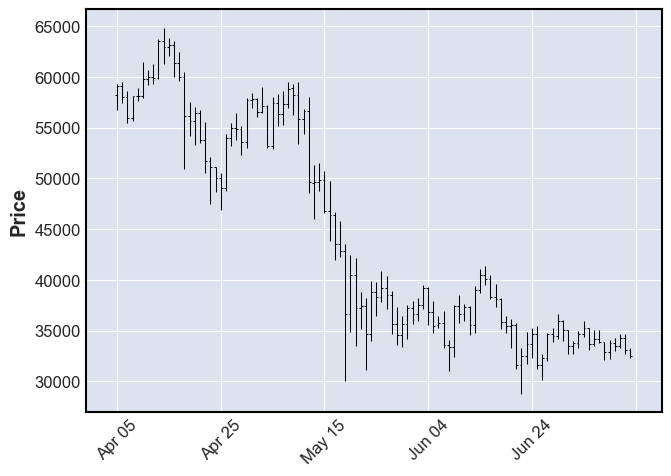

In [39]:
# Basic plot

mpf.plot(hist_btc_usdt_df.set_index("Close Time").tail(100))

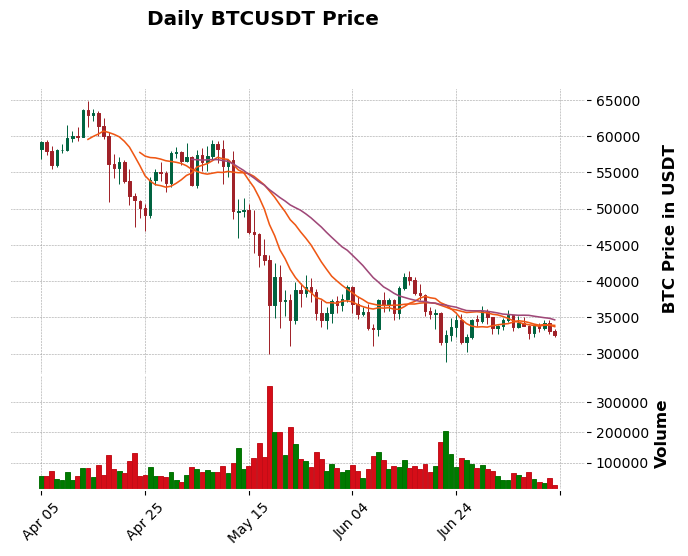

In [40]:
# Customizing the plot:
# Last 100 Days:
# mav means Moving Average

mpf.plot(hist_btc_usdt_df.set_index("Close Time").tail(100),
        type = 'candle', style = 'charles',
        title = 'Daily BTCUSDT Price \n', 
         ylabel = '\n BTC Price in USDT',
        volume = True, mav = (10, 20, 30)
        )

## Extra 1) Creating A Function For Plotting

In [41]:
# Get User Input:

base_cur = 'USDT'
desired_cur = "BTC"

user_pair = desired_cur + base_cur
user_pair

'BTCUSDT'

In [42]:
# User input time_frame:
# daily, weekly, monthly

# Client.KLINE_INTERVAL_1MONTH for monthly
# Client.KLINE_INTERVAL_1WEEK for weekly
# Client.KLINE_INTERVAL_1DAY for daily


In [43]:
user_pair_data = client.get_historical_klines(user_pair, Client.KLINE_INTERVAL_1MONTH, '1 Jan 2011')

In [44]:
user_pair_data = pd.DataFrame(user_pair_data)

In [45]:
# Rename columns
user_pair_data.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
                            'Quote Asset Vol', 'Num Trades', 'Taker Buy Base Vol', 'Taker Buy Quote Vol', 'Ignore'
                           ]

In [46]:
user_pair_data

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Vol,Num Trades,Taker Buy Base Vol,Taker Buy Quote Vol,Ignore
0,1501545600000,4261.48000000,4745.42000000,3400.00000000,4724.89000000,10015.64027200,1504223999999,42538297.66482722,69180,4610.01943100,19419232.11660334,10779.83873125
1,1504224000000,4689.89000000,4939.19000000,2817.00000000,4378.51000000,27634.18912000,1506815999999,110493081.58501816,228745,12353.17004300,49199923.91602857,11158.76978487
2,1506816000000,4378.49000000,6498.01000000,4110.00000000,6463.00000000,41626.38846300,1509494399999,228736757.83148792,303389,19231.85885300,105340098.61188824,15785.31815937
3,1509494400000,6463.00000000,11300.03000000,5325.01000000,9838.96000000,108487.97811900,1512086399999,892748838.39738990,577424,55476.98353800,464487575.89980884,34507.18297716
4,1512086400000,9837.00000000,19798.68000000,9380.00000000,13716.36000000,408476.65839900,1514764799999,5975573892.33559395,3082883,213940.58709900,3122653751.34879877,0
5,1514764800000,13715.65000000,17176.24000000,9035.00000000,10285.10000000,816675.56446700,1517443199999,9979686765.57534106,7214977,405900.52508400,4998781571.24693058,0
6,1517443200000,10285.10000000,11786.01000000,6000.01000000,10326.76000000,1243940.85531000,1519862399999,11576600898.49658111,11684784,605296.66562600,5637272324.13599608,0
7,1519862400000,10325.64000000,11710.00000000,6600.10000000,6923.91000000,1235326.31402000,1522540799999,10789435243.86019626,9237002,600809.01064500,5248981630.13088936,0
8,1522540800000,6922.00000000,9759.82000000,6430.00000000,9246.01000000,1110964.01558100,1525132799999,8963408127.53916937,7421056,562990.66695300,4545945701.67625334,0
9,1525132800000,9246.01000000,10020.00000000,7032.95000000,7485.01000000,914476.37788500,1527811199999,7717053810.96064344,7433740,465963.94634100,3927577118.13362902,0


In [47]:
# To Datetime on Open Time & Close Time columns:
# Dates from Binance are a timestamp

user_pair_data['Open Time'] = pd.to_datetime(user_pair_data['Open Time'] / 1000, unit = 's')
user_pair_data['Close Time'] = pd.to_datetime(user_pair_data['Close Time'] / 1000, unit = 's')

In [48]:
user_pair_data


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Vol,Num Trades,Taker Buy Base Vol,Taker Buy Quote Vol,Ignore
0,2017-08-01,4261.48000000,4745.42000000,3400.00000000,4724.89000000,10015.64027200,2017-08-31 23:59:59.999000072,42538297.66482722,69180,4610.01943100,19419232.11660334,10779.83873125
1,2017-09-01,4689.89000000,4939.19000000,2817.00000000,4378.51000000,27634.18912000,2017-09-30 23:59:59.999000072,110493081.58501816,228745,12353.17004300,49199923.91602857,11158.76978487
2,2017-10-01,4378.49000000,6498.01000000,4110.00000000,6463.00000000,41626.38846300,2017-10-31 23:59:59.999000072,228736757.83148792,303389,19231.85885300,105340098.61188824,15785.31815937
3,2017-11-01,6463.00000000,11300.03000000,5325.01000000,9838.96000000,108487.97811900,2017-11-30 23:59:59.999000072,892748838.39738990,577424,55476.98353800,464487575.89980884,34507.18297716
4,2017-12-01,9837.00000000,19798.68000000,9380.00000000,13716.36000000,408476.65839900,2017-12-31 23:59:59.999000072,5975573892.33559395,3082883,213940.58709900,3122653751.34879877,0
5,2018-01-01,13715.65000000,17176.24000000,9035.00000000,10285.10000000,816675.56446700,2018-01-31 23:59:59.999000072,9979686765.57534106,7214977,405900.52508400,4998781571.24693058,0
6,2018-02-01,10285.10000000,11786.01000000,6000.01000000,10326.76000000,1243940.85531000,2018-02-28 23:59:59.999000072,11576600898.49658111,11684784,605296.66562600,5637272324.13599608,0
7,2018-03-01,10325.64000000,11710.00000000,6600.10000000,6923.91000000,1235326.31402000,2018-03-31 23:59:59.999000072,10789435243.86019626,9237002,600809.01064500,5248981630.13088936,0
8,2018-04-01,6922.00000000,9759.82000000,6430.00000000,9246.01000000,1110964.01558100,2018-04-30 23:59:59.999000072,8963408127.53916937,7421056,562990.66695300,4545945701.67625334,0
9,2018-05-01,9246.01000000,10020.00000000,7032.95000000,7485.01000000,914476.37788500,2018-05-31 23:59:59.999000072,7717053810.96064344,7433740,465963.94634100,3927577118.13362902,0


In [49]:
user_numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Vol', 
                'Taker Buy Base Vol', 'Taker Buy Quote Vol'
               ]

In [50]:
# Convert into numeric data types for numeric columns with .apply():

user_pair_data[numeric_cols] = user_pair_data[numeric_cols].apply(pd.to_numeric, axis = 1)

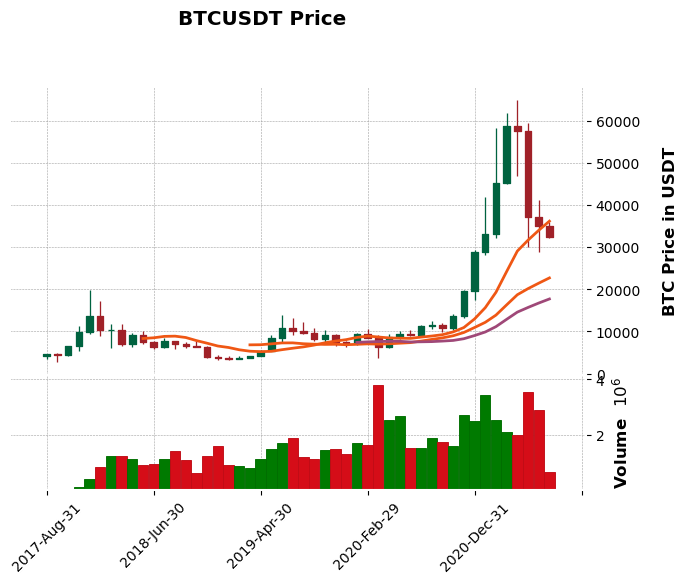

In [51]:
# Mpf Plot based on user settings.

mpf.plot(user_pair_data.set_index("Close Time").tail(100),
        type = 'candle', style = 'charles',
        title = user_pair + ' Price \n', 
         ylabel = '\n' + desired_cur + ' Price in ' + base_cur,
        volume = True, mav = (10, 20, 30)
        )

In [61]:
# Creating the function:
# Plotting last 100 time periods

def plot_crypto_pair(desired_cur, base_cur, time_frame):
    user_pair = desired_cur + base_cur
    # Obtain data
    if time_frame == 'daily':
        user_data = client.get_historical_klines(user_pair, Client.KLINE_INTERVAL_1HOUR, '1 Jan 2011')
    elif time_frame == 'daily':
        user_data = client.get_historical_klines(user_pair, Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')
    elif time_frame == 'weekly':
        user_data = client.get_historical_klines(user_pair, Client.KLINE_INTERVAL_1WEEK, '1 Jan 2011')
    elif time_frame == 'monthly':
        user_data = client.get_historical_klines(user_pair, Client.KLINE_INTERVAL_1MONTH, '1 Jan 2011')
    else:
        return "Choose one of daily, weekly or monthly."
    
    df = pd.DataFrame(user_data)
    df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
                            'Quote Asset Vol', 'Num Trades', 'Taker Buy Base Vol', 'Taker Buy Quote Vol', 'Ignore'
                           ]
    df['Open Time'] = pd.to_datetime(df['Open Time'] / 1000, unit = 's')
    df['Close Time'] = pd.to_datetime(df['Close Time'] / 1000, unit = 's')
    
    user_numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Vol', 
                'Taker Buy Base Vol', 'Taker Buy Quote Vol']
    # Convert into numeric data types for numeric columns with .apply():
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, axis = 1)
    
    #Plot
    
    mpf.plot(df.set_index("Close Time").tail(100),
        type = 'candle', style = 'charles',
        title = user_pair + ' Price \n', 
         ylabel = '\n' + desired_cur + ' Price in ' + base_cur,
        volume = True, mav = (10, 20, 30)
        )

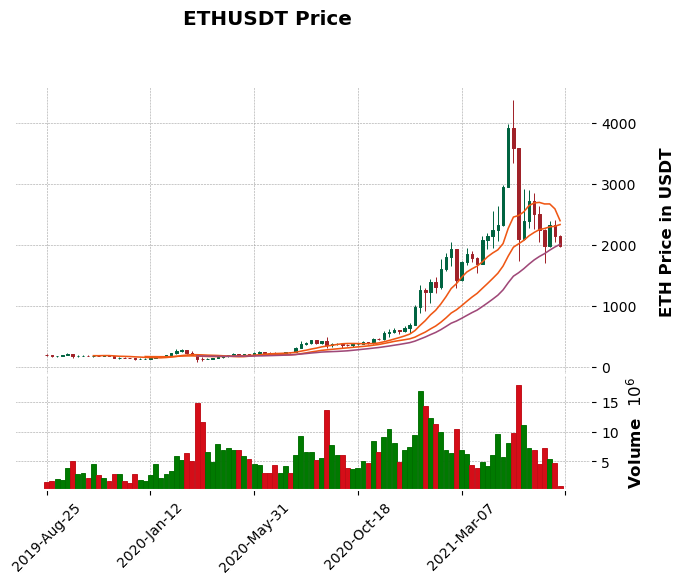

In [66]:
# Function call for ETH USDT weekly:

plot_crypto_pair(desired_cur = 'ETH', base_cur = 'USDT', time_frame = 'weekly')

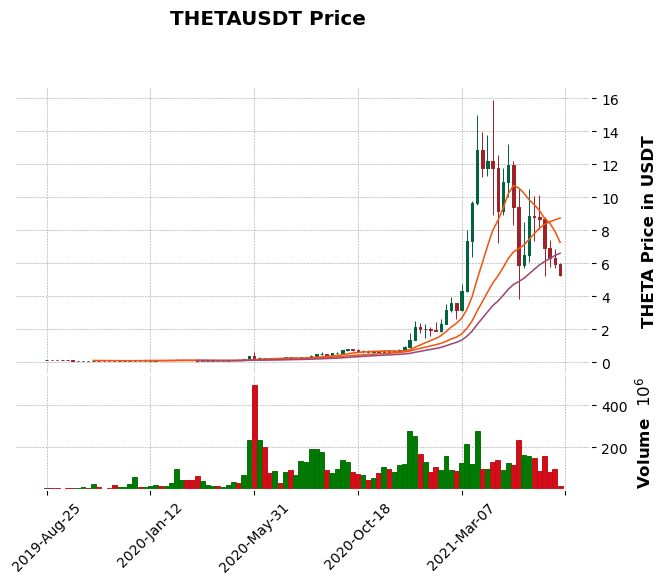

In [70]:
# Function call for THETA/USDT weekly candlestick plot

plot_crypto_pair(desired_cur = 'THETA', base_cur = 'USDT', time_frame = 'weekly')


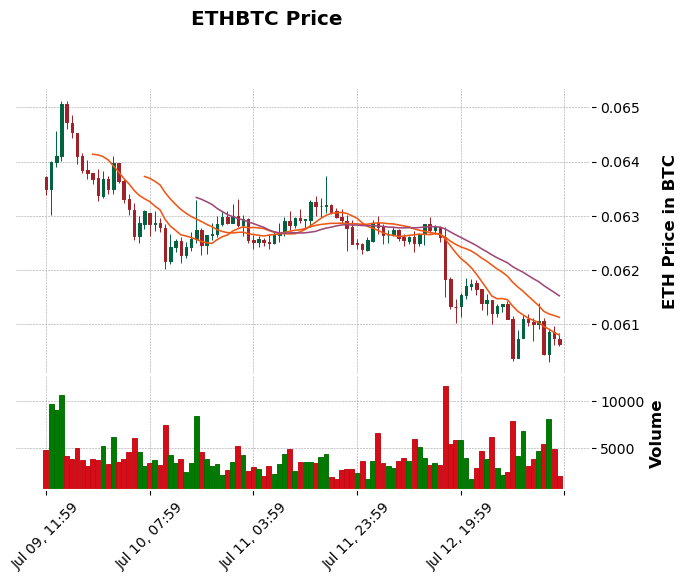

In [72]:
# Function call for ETH/BTC weekly candlestick plot

plot_crypto_pair(desired_cur = 'ETH', base_cur = 'BTC', time_frame = 'daily')